In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [3]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic Analysis
1. Un-nesting the columns

a. Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

In [4]:
netflix_data.shape

(8807, 12)

In [5]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df = netflix_data.copy()

In [9]:
df.director.value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

#### there are comma seperated values in director column, so we need to seperate them

In [10]:
df['director'] = df['director'].str.split(',')
df = df.explode('director')

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.director.value_counts()

Rajiv Chilaka       22
Raúl Campos         18
 Jan Suter          18
Marcus Raboy        16
Suhas Kadav         16
                    ..
Will Eisenberg       1
Marina Seresesky     1
Kenny Leon           1
James Dearden        1
Mozez Singh          1
Name: director, Length: 5120, dtype: int64

#### There are spaces before the direcotors name , so we need to remove it

In [13]:
df['director'] = df['director'].str.strip()

In [14]:
df.director.value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

In [15]:
df.country.value_counts()

United States                             3104
India                                     1043
United Kingdom                             444
Japan                                      260
Canada                                     204
                                          ... 
Canada, Germany, France, United States       1
United Kingdom, Ireland, United States       1
Uruguay, Argentina, Spain                    1
Croatia                                      1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [16]:
df['country'] = df['country'].str.split(',')
df = df.explode('country')

In [17]:
df['country'] = df['country'].str.strip()

In [18]:
df.country.value_counts()

United States     4089
India             1130
United Kingdom     858
Canada             499
France             446
                  ... 
Belarus              1
Bahamas              1
Sri Lanka            1
Latvia               1
Montenegro           1
Name: country, Length: 123, dtype: int64

#### Converting date_added column to datetime

In [19]:
df['date_added'].dtypes

dtype('O')

In [20]:
df['date_added'] = pd.to_datetime(df['date_added']).dt.date

In [21]:
df['date_added'].dtypes

dtype('O')

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 2. Handling null values
a. For categorical variables with null values, update those rows as
unknown_column_name.

Example : Replace missing value with Unknown Actor for missing value in
Actors column.

b. Replace with 0 for continuous variables having null values.

In [23]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2970
cast            1192
country          881
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [24]:
df.shape

(11917, 12)

In [25]:
df.director.fillna('Unknown_director', inplace = True)

In [26]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast            1192
country          881
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [27]:
df.cast.fillna('Unknown_cast', inplace = True)

In [28]:
df.country.fillna('Unknown_country', inplace=True)

In [29]:
df.rating.fillna('Unknown_rating', inplace=True)

In [30]:
df.duration.fillna('Unknown_duration', inplace = True)

# 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

a. For Non-graphical Analysis:

Hint : We want you to find the values counts of each category for the given
column

b. For graphical analysis:

Hint : We can use a count plot to get the counts of each category

In [31]:
df.type.value_counts()

Movie      8770
TV Show    3147
Name: type, dtype: int64

In [32]:
df.director.value_counts()

Unknown_director          2970
Rajiv Chilaka               22
Jan Suter                   21
Raúl Campos                 19
Steven Spielberg            18
                          ... 
YC Tom Lee                   1
Manu Ashokan                 1
Anita Udeep                  1
Alberto Arnaut Estrada       1
Mozez Singh                  1
Name: director, Length: 4994, dtype: int64

In [33]:
df.country.value_counts()

United States      4089
India              1130
Unknown_country     881
United Kingdom      858
Canada              499
                   ... 
Belarus               1
Bahamas               1
Sri Lanka             1
Latvia                1
Montenegro            1
Name: country, Length: 124, dtype: int64

In [34]:
df.release_year.value_counts()

2018    1515
2017    1397
2019    1312
2016    1262
2020    1161
        ... 
1964       2
1947       2
1925       1
1966       1
1959       1
Name: release_year, Length: 74, dtype: int64

In [35]:
df.rating.value_counts()

TV-MA             4152
TV-14             2570
R                 1324
TV-PG             1113
PG-13              827
PG                 538
TV-Y7              471
TV-Y               425
TV-G               266
NR                 121
G                   86
TV-Y7-FV             8
NC-17                5
Unknown_rating       4
UR                   4
74 min               1
84 min               1
66 min               1
Name: rating, dtype: int64

In [36]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [37]:
df.duration.nunique()

221

In [38]:
df.listed_in.nunique()

514

<AxesSubplot:xlabel='type', ylabel='count'>

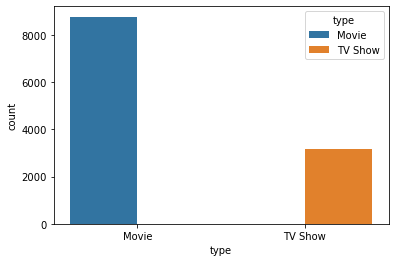

In [39]:
sns.countplot(data=df, x='type', hue='type')

In [40]:
top_10_directors = df.director.value_counts(ascending=False).head(10)

In [41]:
top_10_directors

Unknown_director    2970
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Steven Spielberg      18
Martin Scorsese       18
Youssef Chahine       17
Marcus Raboy          16
Suhas Kadav           16
Martin Campbell       15
Name: director, dtype: int64

In [42]:
top_10_directors = df.director.value_counts(ascending=False).drop('Unknown_director').head(10)

In [43]:
top_10_directors

Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Steven Spielberg    18
Martin Scorsese     18
Youssef Chahine     17
Marcus Raboy        16
Suhas Kadav         16
Martin Campbell     15
Don Michael Paul    15
Name: director, dtype: int64

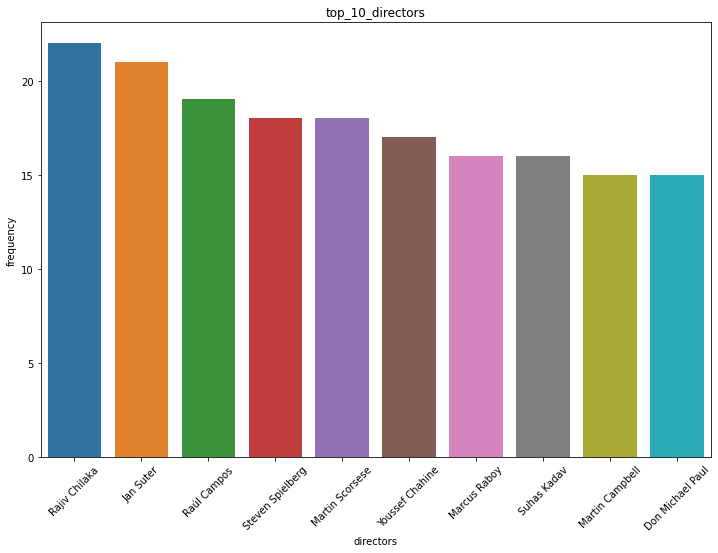

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values)
plt.title('top_10_directors')
plt.xlabel('directors')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='director', ylabel='count'>

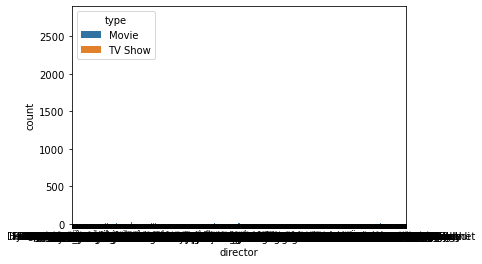

In [45]:
sns.countplot(data=df, x='director', hue='type')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'Unknown_rating'),
  Text(16, 0, 'TV-Y7-FV'),
  Text(17, 0, 'UR')])

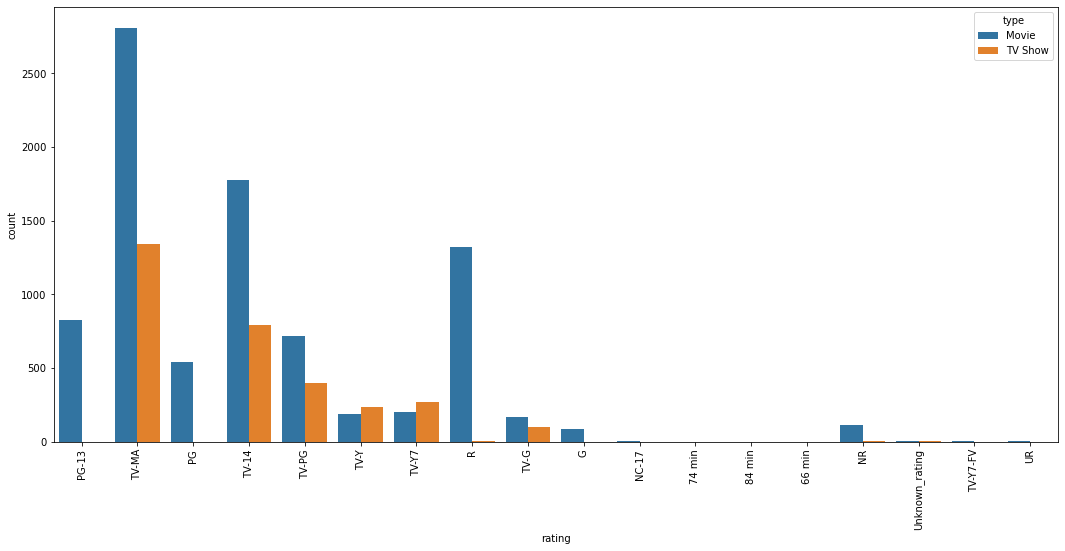

In [46]:
plt.figure(figsize=(18,8))
sns.countplot(data=df, x='rating', hue='type')
plt.xticks(rotation=90)

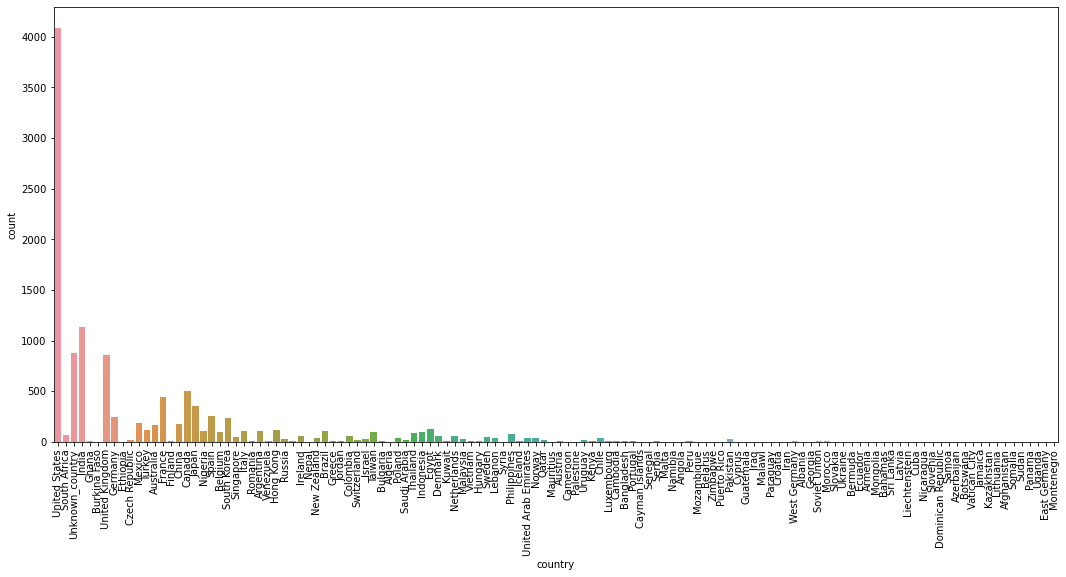

In [47]:
plt.figure(figsize=(18,8))
sns.countplot(data=df, x='country')
plt.xticks(rotation=90)
plt.show()

## 2. Comparison of tv shows vs. movies.
a. Find the number of movies produced in each country and pick the top 10
countries.
Hint : We want you to apply group by each country and find the count of unique
titles of movies

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.
Hint : We want you to apply group by each country and find the count of unique
titles of Tv-shows

In [48]:
movies_and_TvShows_countries = df.groupby('country')['title'].count()

In [49]:
movies_and_TvShows_countries

country
                7
Afghanistan     1
Albania         1
Algeria         3
Angola          2
               ..
Vatican City    1
Venezuela       6
Vietnam         8
West Germany    6
Zimbabwe        4
Name: title, Length: 124, dtype: int64

In [50]:
top_10_movies_and_TvShows_countries = movies_countries.nlargest(10)

NameError: name 'movies_countries' is not defined

In [ ]:
top_10_movies_and_TvShows_countries

In [51]:
top_10_movies_and_TvShows_countries = movies_countries.drop('Unknown_country').nlargest(10)

NameError: name 'movies_countries' is not defined

In [52]:
top_10_movies_and_TvShows_countries

NameError: name 'top_10_movies_and_TvShows_countries' is not defined

In [53]:
%matplotlib inline
plt.figure(figsize=(18,8))
sns.barplot(x=top_10_movies_and_TvShows_countries.index, y=top_10_movies_and_TvShows_countries.values, color="blue")
plt.xticks(rotation=90)
plt.show()

NameError: name 'top_10_movies_and_TvShows_countries' is not defined

<Figure size 1296x576 with 0 Axes>

In [54]:
top_10_movies_by_countries = df[df['type']=='Movie'].groupby('country')['title'].count()

In [55]:
top_10_movies_by_countries

country
                6
Afghanistan     1
Albania         1
Algeria         3
Angola          2
               ..
Vatican City    1
Venezuela       6
Vietnam         8
West Germany    4
Zimbabwe        4
Name: title, Length: 119, dtype: int64

In [56]:
top_10_movies_by_countries = df[df['type']=='Movie'].groupby('country')['title'].count().nlargest(11)

In [57]:
top_10_movies_by_countries

country
United States      3126
India              1025
United Kingdom      581
Unknown_country     480
Canada              369
France              351
Germany             197
Spain               188
Japan               152
Mexico              129
China               128
Name: title, dtype: int64

In [58]:
top_10_movies_by_countries = top_10_movies_by_countries.drop('Unknown_country')

In [59]:
top_10_movies_by_countries

country
United States     3126
India             1025
United Kingdom     581
Canada             369
France             351
Germany            197
Spain              188
Japan              152
Mexico             129
China              128
Name: title, dtype: int64

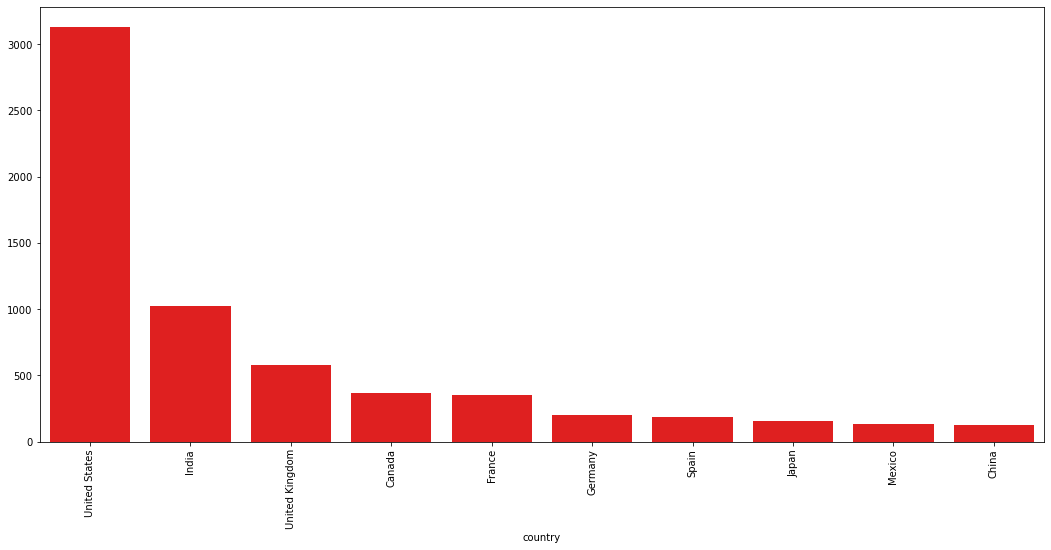

In [60]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_10_movies_by_countries.index, y=top_10_movies_by_countries.values, color="red")
plt.xticks(rotation=90)
plt.show()

In [61]:
top_10_TvShows_by_countries = df[df['type']=='TV Show'].groupby('country')['title'].count()

In [62]:
top_10_TvShows_by_countries

country
                     1
Argentina           20
Australia           66
Austria              1
Azerbaijan           1
                  ... 
United Kingdom     277
United States      963
Unknown_country    401
Uruguay              1
West Germany         2
Name: title, Length: 67, dtype: int64

In [63]:
top_10_TvShows_by_countries = top_10_TvShows_by_countries.nlargest(11)

In [64]:
top_10_TvShows_by_countries

country
United States      963
Unknown_country    401
United Kingdom     277
Japan              206
South Korea        174
Canada             130
India              105
France              95
Taiwan              80
Spain               68
Australia           66
Name: title, dtype: int64

In [65]:
top_10_TvShows_by_countries = top_10_TvShows_by_countries.drop('Unknown_country')

In [66]:
top_10_TvShows_by_countries

country
United States     963
United Kingdom    277
Japan             206
South Korea       174
Canada            130
India             105
France             95
Taiwan             80
Spain              68
Australia          66
Name: title, dtype: int64

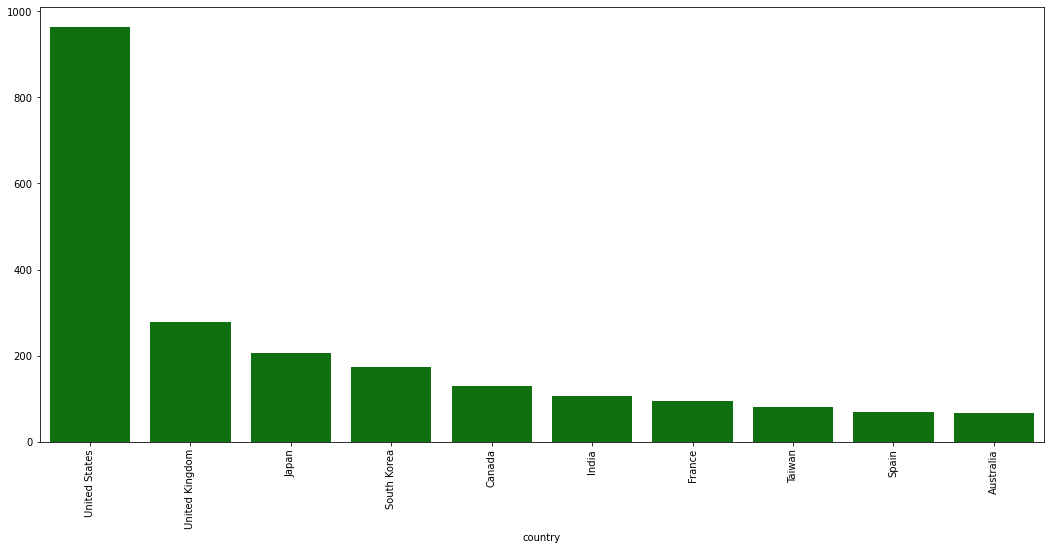

In [67]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_10_TvShows_by_countries.index, y=top_10_TvShows_by_countries.values, color="green")
plt.xticks(rotation=90)
plt.show()

## 3. What is the best time to launch a TV show?
a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each week and count
the total number of movies/ tv shows.

b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [68]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [69]:
df['weekday'] = df['date_added'].dt.day_name()

In [70]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday


In [71]:
Movies_count = df[df['type'] == 'Movie']['weekday'].value_counts()

In [72]:
Movies_count

Friday       2297
Thursday     1423
Wednesday    1303
Tuesday      1141
Monday        930
Sunday        911
Saturday      765
Name: weekday, dtype: int64

In [73]:
TvShows_count = df[df['type'] == 'TV Show']['weekday'].value_counts()

In [74]:
TvShows_count

Friday       1100
Tuesday       442
Wednesday     422
Thursday      413
Saturday      302
Monday        251
Sunday        207
Name: weekday, dtype: int64

In [75]:
Movies_count = Movies_count.sort_values(ascending = False)

In [76]:
Movies_count

Friday       2297
Thursday     1423
Wednesday    1303
Tuesday      1141
Monday        930
Sunday        911
Saturday      765
Name: weekday, dtype: int64

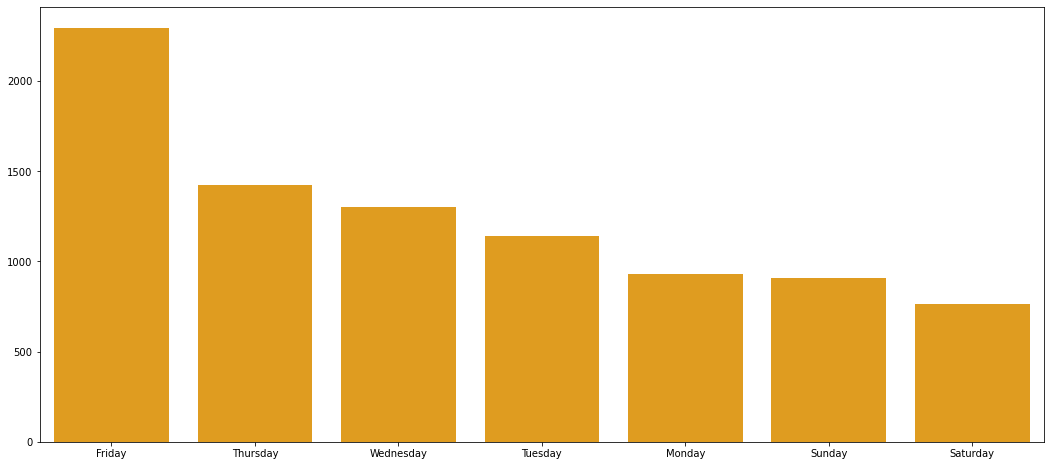

In [77]:
plt.figure(figsize=(18,8))
sns.barplot(x=Movies_count.index, y=Movies_count.values, color="orange")
plt.show()

### Best week_day to release Movies is on Friday

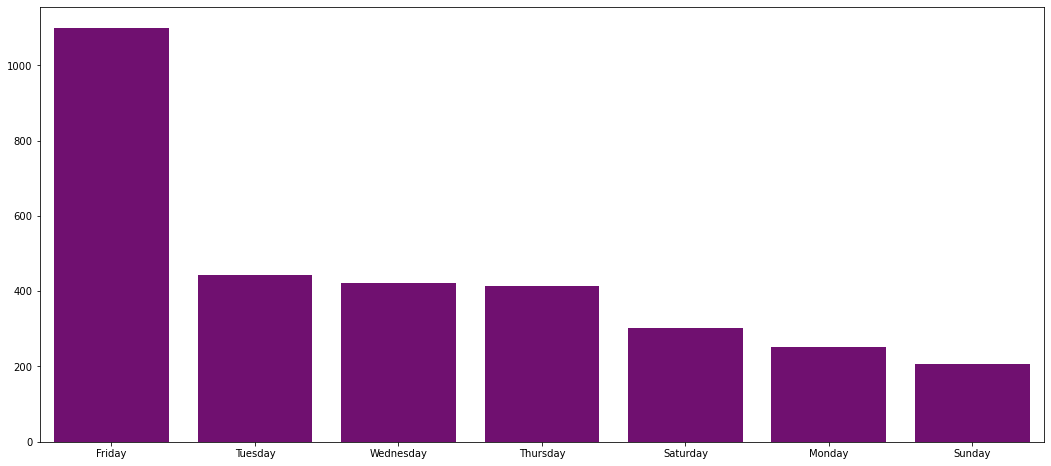

In [78]:
plt.figure(figsize=(18,8))
sns.barplot(x=TvShows_count.index, y=TvShows_count.values, color="purple")
plt.show()

### Best week_day to release Tv_shows is on Friday

In [79]:
df['month'] = df['date_added'].dt.month_name()

In [80]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,weekday,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,September
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,September
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,September
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,September


In [81]:
Movies_count_month = df[df['type'] == 'Movie']['month'].value_counts()

In [82]:
Movies_count_month

July         863
October      827
January      818
September    779
April        779
December     756
August       708
March        703
November     684
June         681
May          610
February     562
Name: month, dtype: int64

In [83]:
TvShows_count_month = df[df['type'] == 'TV Show']['month'].value_counts()

In [84]:
TvShows_count_month

December     316
July         290
April        283
September    279
August       276
June         269
January      252
May          242
November     242
March        238
October      235
February     215
Name: month, dtype: int64

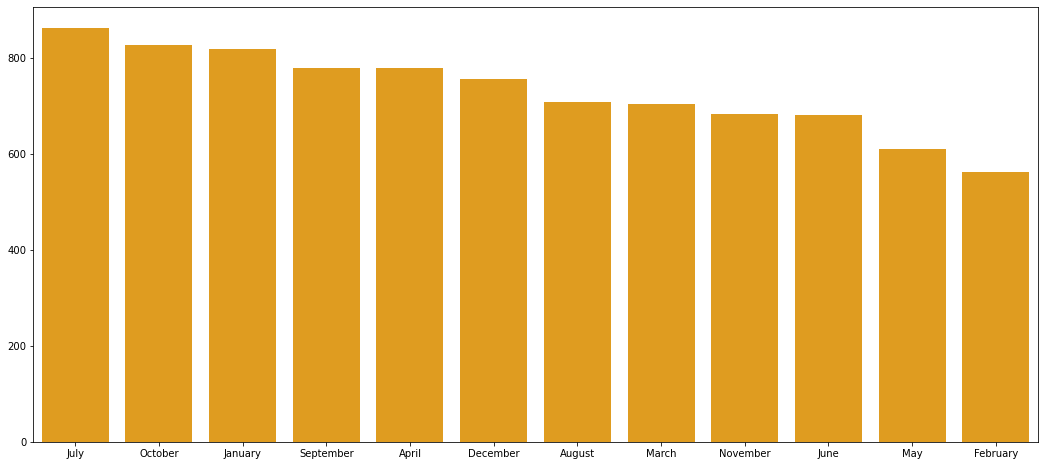

In [85]:
plt.figure(figsize=(18,8))
sns.barplot(x=Movies_count_month.index, y=Movies_count_month.values, color="orange")
plt.show()

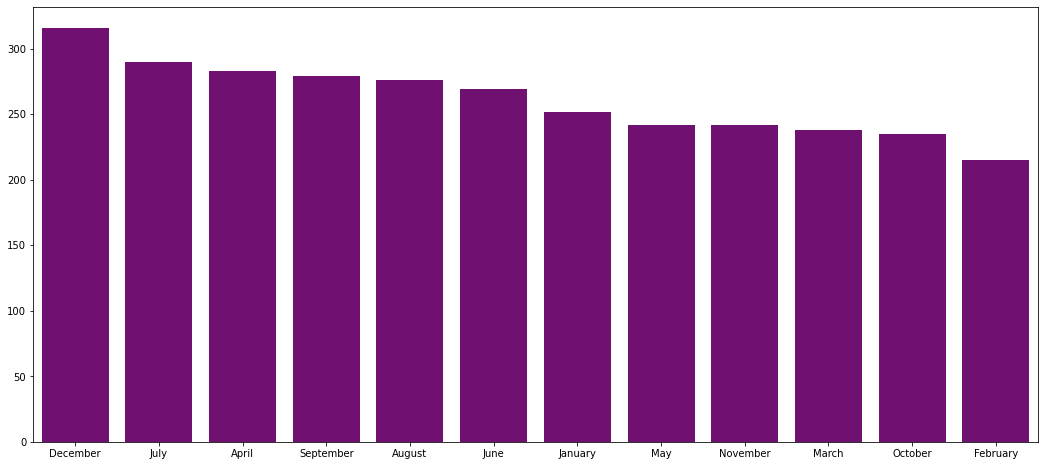

In [86]:
plt.figure(figsize=(18,8))
sns.barplot(x=TvShows_count_month.index, y=TvShows_count_month.values, color="purple")
plt.show()

### Best month to release movies in "July" and Tv_shows in "December"

### 4. Analysis of actors/directors of different types of shows/movies.
a. Identify the top 10 directors who have appeared in most movies or TV shows.
Hint : We want you to group by each actor and find the count of unique titles of
Tv-shows/movies

b. Identify the top 10 directors who have appeared in most movies or TV shows.
Hint : We want you to group by each director and find the count of unique titles
of Tv-shows/movies

In [87]:
top_10_directors = df[df['type'] == 'Movie']['director'].value_counts()

In [88]:
top_10_directors

Unknown_director    211
Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Steven Spielberg     18
                   ... 
Vasan Bala            1
Pedring A. Lopez      1
Sam Cullman           1
Stefon Bristol        1
Mozez Singh           1
Name: director, Length: 4778, dtype: int64

In [89]:
top_10_directors = top_10_directors.drop('Unknown_director').nlargest(10)

In [90]:
top_10_directors

Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Steven Spielberg    18
Martin Scorsese     18
Youssef Chahine     17
Suhas Kadav         16
Martin Campbell     15
Marcus Raboy        15
Don Michael Paul    15
Name: director, dtype: int64

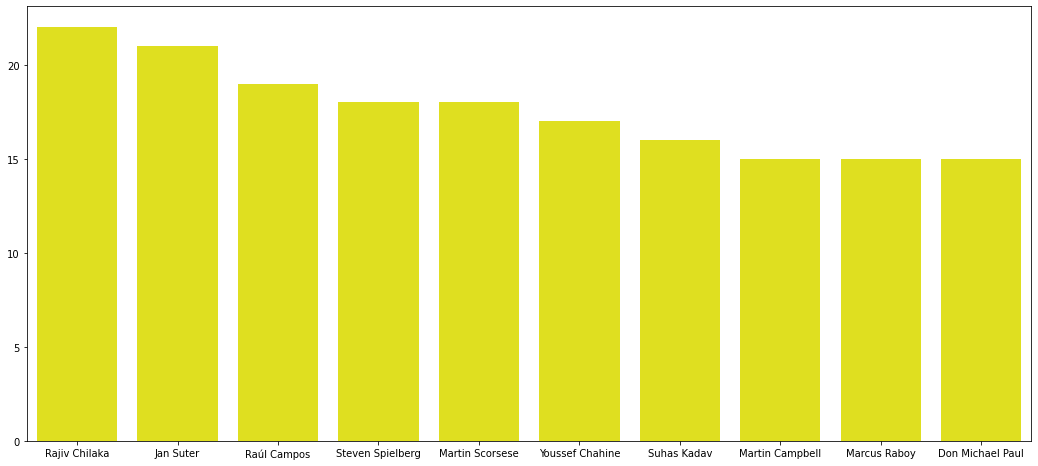

In [91]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, color="yellow")
plt.show()

#### Rajiv Chilaka was the top one director who appeared most in Movies

In [92]:
top_10_directors_Tv = df[df['type'] == 'TV Show']['director'].value_counts()

In [93]:
top_10_directors_Tv

Unknown_director       2759
Alastair Fothergill       8
Moyoung Jin               5
Hikaru Toda               5
Fahad Mustafa             5
                       ... 
Steven Bognar             1
Julia Reichert            1
Alejandro Hartmann        1
Juliana Vicente           1
Michael Cumming           1
Name: director, Length: 300, dtype: int64

In [94]:
top_10_directors_Tv = top_10_directors_Tv.drop('Unknown_director').nlargest(10)

In [95]:
top_10_directors_Tv

Alastair Fothergill         8
Moyoung Jin                 5
Hikaru Toda                 5
Fahad Mustafa               5
Deepti Kakkar               5
Chico Pereira               5
Caroline Sá                 5
Elaine McMillion Sheldon    5
Justin Webster              4
Laïla Marrakchi             4
Name: director, dtype: int64

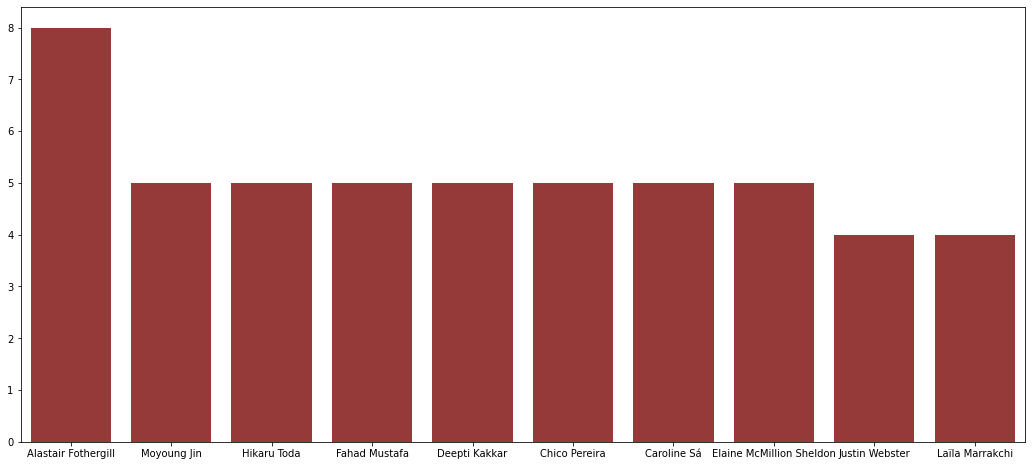

In [96]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_10_directors_Tv.index, y=top_10_directors_Tv.values, color="brown")
plt.show()

#### Alastair Fothergill is the most appeared director in TV Shows

### 5. Which genre movies are more popular or produced more
Hint : We want you to apply the word cloud on the genre columns to know which kind
of genre is produced

In [97]:
from wordcloud import WordCloud

In [98]:
all_genres = ''.join(df['listed_in'])

In [99]:
wordcloud = WordCloud(width=800, height=400, background_color = 'white', colormap='viridis').generate(all_genres)

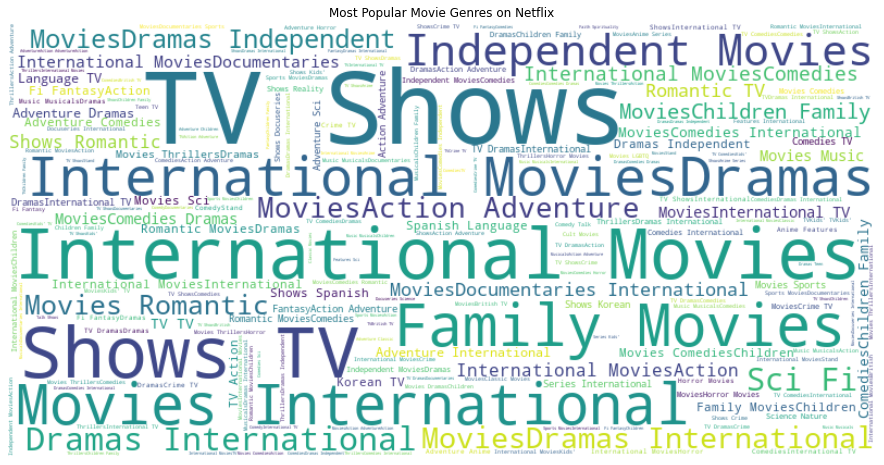

In [100]:
plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Movie Genres on Netflix')
plt.show()

### From above figure we have observed that Tv Shows, International Movies, Family Movies, International moviesDrams are appeared most

### 6. Find After how many days the movie will be added to Netflix after the release ofthe movie (you can consider  the recent past data)
Hint : We want you to get the difference between the columns having date added
information and release year information and get the mode of difference. This
will give an insight into what will be the better time to add in Netflix

In [101]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y').dt.year

In [102]:
df['time_difference'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

In [103]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,weekday,month,time_difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,September,633.0
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,September,266.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,September,266.0
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,September,266.0
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,September,266.0


F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20799 (\N{CJK UNIFIED IDEOGRAPH-513F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: 

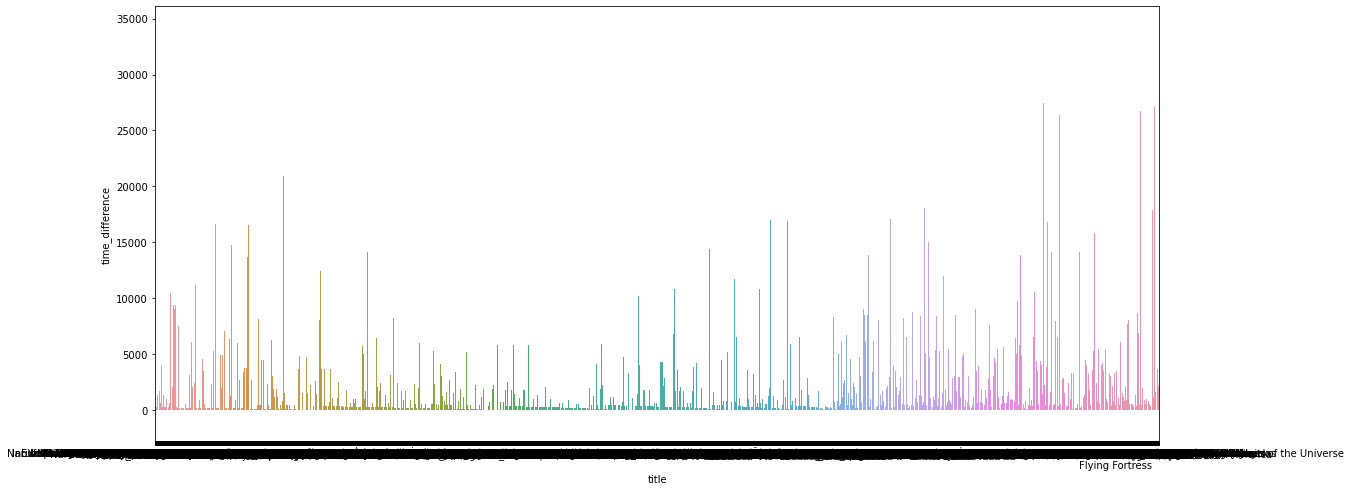

In [115]:
plt.figure(figsize=(18,8))
sns.barplot(data = df, x='title', y="time_difference", ci=None)
plt.show()

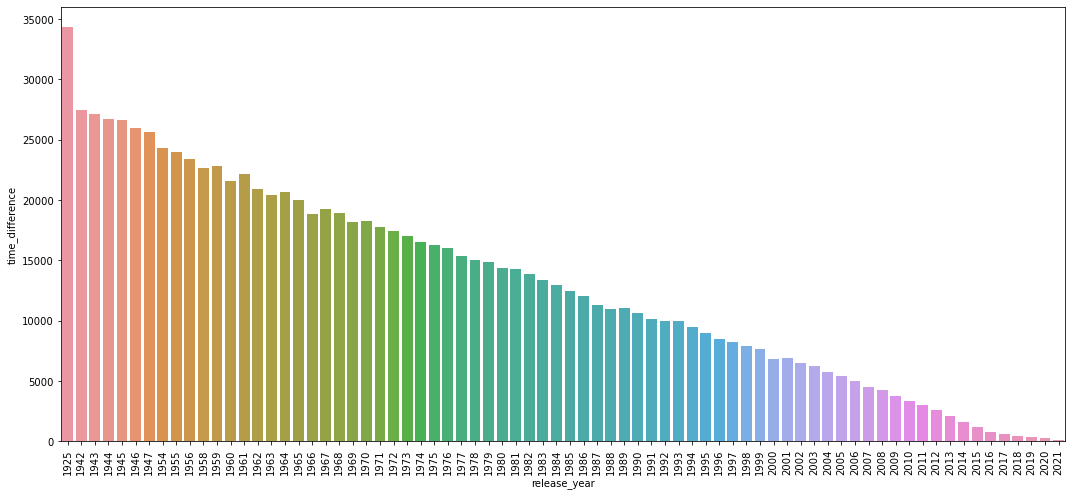

In [117]:
plt.figure(figsize=(18,8))
sns.barplot(data = df, x='release_year', y="time_difference", ci=None)
plt.xticks(rotation=90)
plt.show()

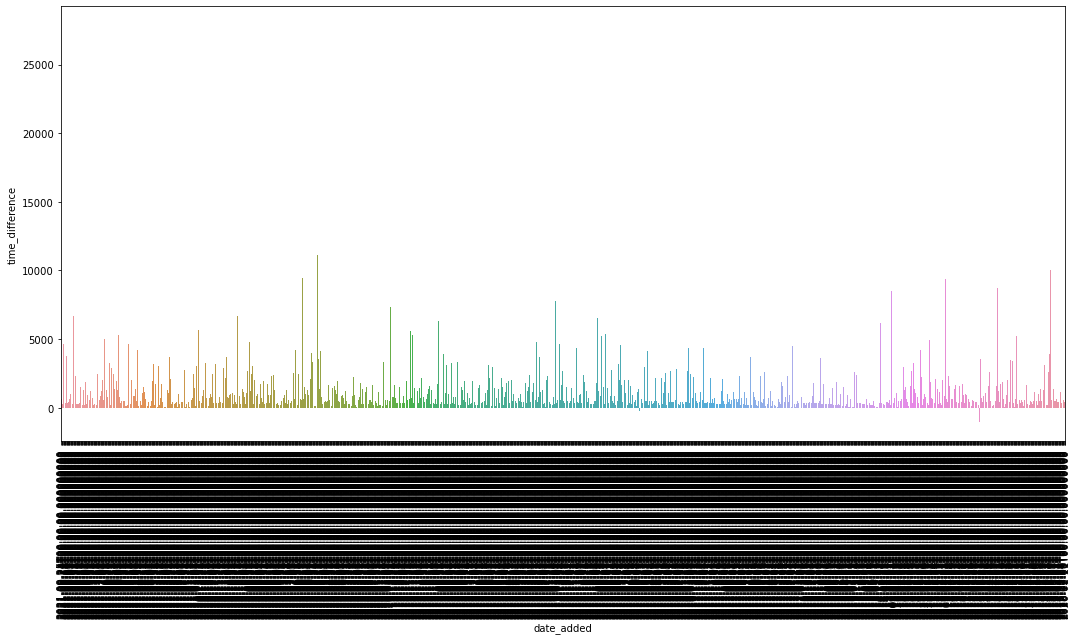

In [118]:
plt.figure(figsize=(18,8))
sns.barplot(data = df, x='date_added', y="time_difference", ci=None)
plt.xticks(rotation=90)
plt.show()

### From above information we found that after how many days the movies / tvshows added to Netflix

### Business Insights:
    1. From above Data it is observed that Netflix contains more Movies as compared to TV Shows.
    2. United States is the most produced Movies and TV Shows as compared to other countries.
    3. Friday is the best weekday to release Movies and TV Shows And the best month to release Movies is 'JULY' and best month for TV Shows to release is 'December'.
    4. 'Rajiv Chilaka' is the top one director for Movies and 'Alastair Fothergill' is the top one director for TV Shows.
    5. From Netflix Data Genres it is found that international movies, family movies, TV Shows, Dramas and sci-fi has observed most.

### Recommendations:
    1. There is a very gap of release_year and date_added to netflix, if its minimised than it would be better.